### Importación de datos



In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)



Ingreso total por tienda:
Tienda 1: $1150880400.0
Tienda 2: $1116343500.0
Tienda 3: $1098019600.0
Tienda 4: $1038375700.0


#1. Análisis de facturación



In [22]:
ingreso1 = tienda['Precio'].sum()
ingreso2 = tienda2['Precio'].sum()
ingreso3 = tienda3['Precio'].sum()
ingreso4 = tienda4['Precio'].sum()

print("Ingreso total por tienda:")
print(f"Tienda 1: ${ingreso1}")
print(f"Tienda 2: ${ingreso2}")
print(f"Tienda 3: ${ingreso3}")
print(f"Tienda 4: ${ingreso4}")

Ingreso total por tienda:
Tienda 1: $1150880400.0
Tienda 2: $1116343500.0
Tienda 3: $1098019600.0
Tienda 4: $1038375700.0


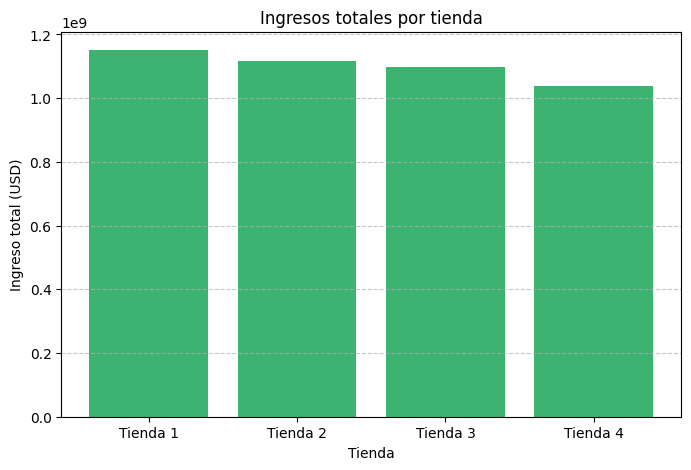

In [23]:
ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso1, ingreso2, ingreso3, ingreso4]
})

plt.figure(figsize=(8, 5))
plt.bar(ingresos['Tienda'], ingresos['Ingreso Total'], color='mediumseagreen')
plt.title('Ingresos totales por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso total (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Ventas por categoría

In [26]:
ventas_categoria = pd.concat([tienda, tienda2, tienda3, tienda4])
ventas_categoria = ventas_categoria.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print(ventas_categoria)


Categoría del Producto
Electrónicos               1.660576e+09
Electrodomésticos          1.324751e+09
Muebles                    7.576610e+08
Instrumentos musicales     3.487726e+08
Deportes y diversión       1.429777e+08
Juguetes                   7.360440e+07
Artículos para el hogar    5.757980e+07
Libros                     3.769610e+07
Name: Precio, dtype: float64


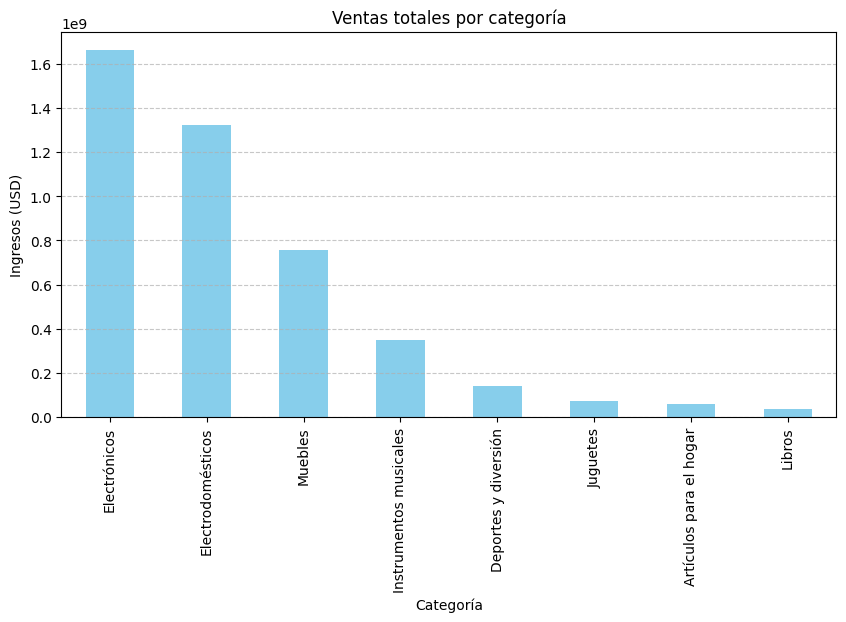

In [27]:
plt.figure(figsize=(10,5))
ventas_categoria.plot(kind='bar', color='skyblue')
plt.title('Ventas totales por categoría')
plt.ylabel('Ingresos (USD)')
plt.xlabel('Categoría')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3. Calificación promedio de la tienda


In [34]:
calificacion_promedio = calificacion.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False)
print("Calificación promedio general:", round(calificacion_promedio, 2))



Calificación promedio general: Categoría del Producto
Juguetes                   4.07
Muebles                    4.03
Electrodomésticos          4.01
Libros                     4.00
Instrumentos musicales     4.00
Electrónicos               3.99
Deportes y diversión       3.99
Artículos para el hogar    3.98
Name: Calificación, dtype: float64


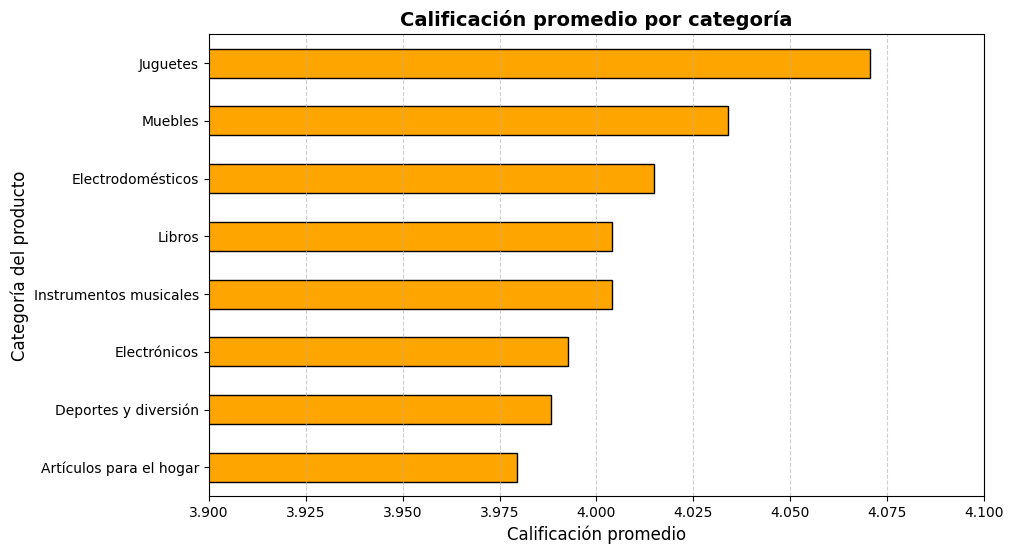

In [36]:
plt.figure(figsize=(10,6))
calificacion_promedio.sort_values(ascending=True).plot(
    kind='barh', color='orange', edgecolor='black'
)
plt.title('Calificación promedio por categoría', fontsize=14, fontweight='bold')
plt.xlabel('Calificación promedio', fontsize=12)
plt.ylabel('Categoría del producto', fontsize=12)
plt.xlim(3.9, 4.1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# 4. Productos más y menos vendidos

In [38]:
productos = pd.concat([tienda, tienda2, tienda3, tienda4])
productos_vendidos = productos.groupby('Producto')['Precio'].count().sort_values(ascending=False)

top_10 = productos_vendidos.head(10)
bottom_10 = productos_vendidos.tail(10)

print("🔝 Productos más vendidos:")
print(top_10)
print("\n🔻 Productos menos vendidos:")
print(bottom_10)


🔝 Productos más vendidos:
Producto
Mesa de noche                210
Microondas                   206
Carrito de control remoto    206
Batería                      203
Cama king                    201
Modelado predictivo          200
Secadora de ropa             200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: Precio, dtype: int64

🔻 Productos menos vendidos:
Producto
Smartwatch                     172
Olla de presión                172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: Precio, dtype: int64


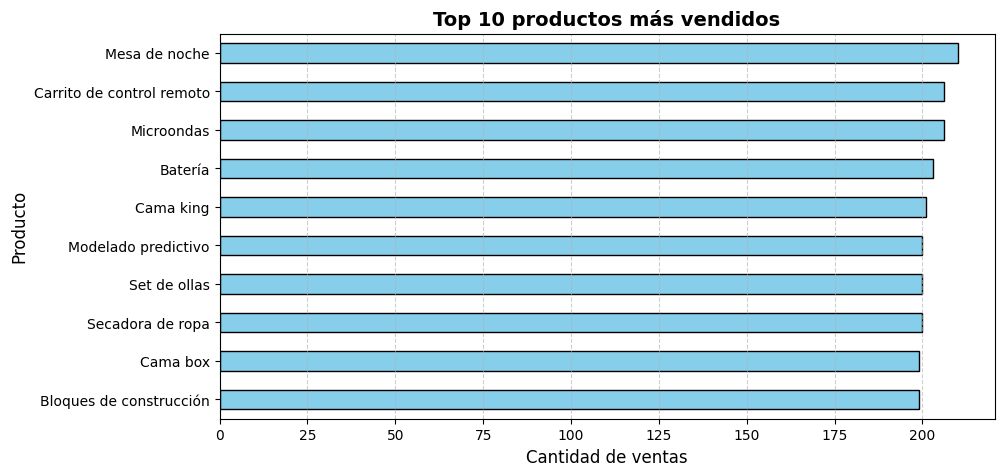

In [39]:
plt.figure(figsize=(10,5))
top_10.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 productos más vendidos', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de ventas', fontsize=12)
plt.ylabel('Producto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# 5. Envío promedio por tienda

In [40]:
envio_promedio1 = tienda['Costo de envío'].mean()
envio_promedio2 = tienda2['Costo de envío'].mean()
envio_promedio3 = tienda3['Costo de envío'].mean()
envio_promedio4 = tienda4['Costo de envío'].mean()

print("Costo de envío promedio por tienda:")
print(f"Tienda 1: ${envio_promedio1:.2f}")
print(f"Tienda 2: ${envio_promedio2:.2f}")
print(f"Tienda 3: ${envio_promedio3:.2f}")
print(f"Tienda 4: ${envio_promedio4:.2f}")


Costo de envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


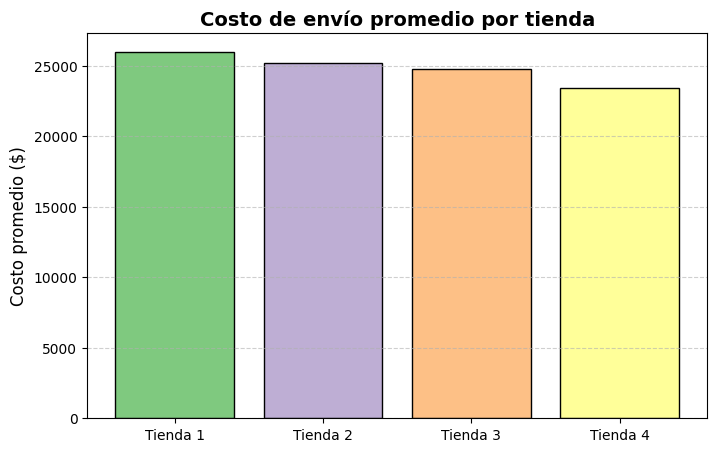

In [41]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios = [envio_promedio1, envio_promedio2, envio_promedio3, envio_promedio4]

plt.figure(figsize=(8,5))
plt.bar(tiendas, envios, color=['#7fc97f','#beaed4','#fdc086','#ffff99'], edgecolor='black')
plt.title('Costo de envío promedio por tienda', fontsize=14, fontweight='bold')
plt.ylabel('Costo promedio ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

